# 0) Импорт библиотек

In [2]:
from youtube_transcript_api import YouTubeTranscriptApi

from summarizer import Summarizer
from nltk.tokenize import TextTilingTokenizer

from matplotlib import pylab

from gensim.summarization import keywords

import my_func
import my_segment
import my_keywords

import warnings

warnings.filterwarnings('ignore')

# 1) Извлечение субтитров из видео.

In [3]:
link = 'https://www.youtube.com/watch?v=g1Pgo5yTIKg'
link_id = link.replace('https://www.youtube.com/watch?v=', '')

data = YouTubeTranscriptApi.get_transcript(link_id)
data[:3]

[{'text': ">> It's my pleasure to\nwelcome Bhaskar Mitra today.",
  'start': 3.9,
  'duration': 3.32},
 {'text': 'Bhaskar is actually stationed', 'start': 7.231, 'duration': 2.579},
 {'text': 'in our London office currently.',
  'start': 9.811,
  'duration': 1.779}]

In [4]:
text = ''.join([data[i]['text']+' ' for i in range(len(data))])

# 2) Сегментация на предложения при необходимости

In [9]:
if '.' not in text:
    text_main = my_func.my_processing(text)
    # segmentation with NNsplit, deepsegment, punctuator
    text = my_segment.segment(text_main, method_name='NNsplit') 

In [10]:
text

'>> It\'s my pleasure to\nwelcome Bhaskar Mitra today. Bhaskar is actually stationed in our London office currently. He\'s been at Microsoft now\nabout 11 years, is that right? Yes. About 11 years as\na Scientist in Bing. And somewhere during that time, he switched to being a student, about a year or two ago, still while working at Bing. So, he\'s working full-time and completing his Ph.D. at UCL, under Emine Yilmaz, who many of us know and have\ncollaborated with as well. He\'s become one of the leaders in applying neural models specifically to Information\nRetrieval problems. He and Nick Craswell have a nice paper if you\nwould like to read it, that\'s available on\nthe Web right now currently under submission\nto foundations and trends and information\nretrieval that compare traditional ways\nof approaching information retrieval models and where their parallels\nare in the Neural world. And he\'s going to talk to us about some of his recent work. So with that, I\'ll have\nBhaskar ta

# 3) Сегментация на главы.

In [12]:
model = Summarizer()

In [13]:
ww = int(len(text.split(' ')) / 30)
ww

366

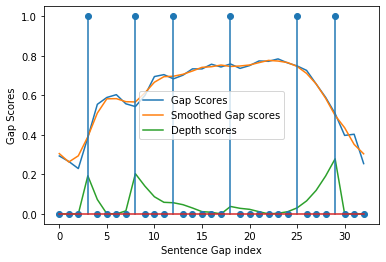

In [14]:
tt = TextTilingTokenizer(demo_mode=True, w = ww)
s, ss, d, b = tt.tokenize(text[:].replace("\n", " ").replace(".", ".\n\n"))
ttt = TextTilingTokenizer(w = ww)
tokens = ttt.tokenize(text.replace("\n", " ").replace(".", ".\n\n"))
pylab.xlabel("Sentence Gap index")
pylab.ylabel("Gap Scores")
pylab.plot(range(len(s)), s, label="Gap Scores")
pylab.plot(range(len(ss)), ss, label="Smoothed Gap scores")
pylab.plot(range(len(d)), d, label="Depth scores")
pylab.stem(range(len(b)), b)
pylab.legend()
pylab.show()

# 4) Генерация ключевых слов для глав.

In [15]:
i = 0
for token in tokens:
    print(i, my_keywords.kw_extr(token.replace("\n", " "), 'gensim').replace("\n", "\ "))
    i += 1

0 different\ differently\ representation\ representations\ learning\ query\ neural models specifically\ text\ specific\ search\ big\ recent\ recently\ online\ retrieval\ retrieve\ today\ office\ main\ possible\ actually\ traditional\ framework\ frameworks\ model\ right\ popular\ papers\ nice paper
1 actually\ feature\ featurize\ featurization\ features like\ different\ example\ examples\ seattle\ representation\ representations\ words\ word\ start\ starts\ space\ spaces\ embeddings\ embedding\ items\ item\ based\ topic\ particular\ seahawks\ zero\ thing\ things\ vector\ vectors\ similar\ similarity\ wilson\ long\ neural\ people\ explicitly\ plus\ come\ coming\ banana
2 query\ queries\ different\ documents\ right\ modelled\ models\ like document\ suffixes\ suffix\ embedding\ actually\ actual\ similar\ similarity\ rank\ ranking\ london\ prefix\ prefixes\ text\ model trained\ big\ tasks\ task\ search\ expects\ expect\ cross\ signal\ start\ question\ examples\ example\ pairs\ pair\ train\ 

# 5) Сопоставление начал глав с временной шкалой.

In [17]:
timestamps = []
ii = 0
for j in range(1, len(data)):
    for i in range(ii, len(tokens)):
        if data[j]['text'].replace("\n", " ")\
                .split('.')[0] in tokens[i].replace("\n", "")\
                .replace(".", ""):
            timestamps += [data[j]['start']]
            ii += 1
            break


In [18]:
timestamps_min = [str(int(x // 3600))+ ':' + 
                  str(int(x // 60 % 60)) + ':' + \
                  str(int(x % 60)) for x in timestamps]

In [19]:
for j in range(len(timestamps_min)):
    print(timestamps[j], timestamps_min[j])

7.231 0:0:7
15.031 0:0:15
1045.436 0:17:25
1430.871 0:23:50
1474.596 0:24:34
1710.981 0:28:30
2045.641 0:34:5


# Финальный результат

In [21]:
i = 0
for j in range(min(len(tokens), len(timestamps_min))):
#     print(token.replace("\n", " "))
    print(i, timestamps_min[i],  my_keywords.kw_extr(tokens[j] .replace(
                    "\n", " "), 'gensim').replace("\n", "\ ").split(' ')[:3])
    i += 1
    #     print("\n") 

0 0:0:7 ['different\\', 'differently\\', 'representation\\']
1 0:0:15 ['actually\\', 'feature\\', 'featurize\\']
2 0:17:25 ['query\\', 'queries\\', 'different\\']
3 0:23:50 ['like\\', 'likely\\', 'word\\']
4 0:24:34 ['model\\', 'modeling\\', 'models\\']
5 0:28:30 ['model\\', 'models\\', 'different\\']
6 0:34:5 ['different\\', 'difference\\', 'model\\']
